In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.io import fits
import numpy as np
import scipy as sp
from scipy.optimize import curve_fit 

bias = []
for i in range(1,11):
    bias.append(fits.getdata("0"*(4-len(str(i)))+str(i)+"bias.fit" , ext=0).astype(np.int))
# These first few blocks are using the data found on Canvas

In [2]:
np.asarray(bias).shape

(10, 2504, 3326)

In [3]:
bias[0].std()

21.34189875589353

In [4]:
(bias[0] - bias[1]).std()

29.752834721583348

In [5]:
avbias = sum(bias)/10

In [6]:
(sum(bias)).std()

74.76957226396333

In [7]:
# Importing the flat frames from Canvas
flat_164 = []
for i in range(1,11):
    flat_164.append(fits.getdata("flat_164-"+"0"*(4-len(str(i)))+str(i)+".fit" , ext=0).astype(np.int))

In [8]:
flat_164_sub_bias = np.array([flat - avbias for flat in flat_164])

In [9]:
flat_164_sub_bias[0].mean()

16872.100176326425

In [10]:
flat_164_sub_bias[0].std()

494.5146255366495

In [11]:
print(flat_164_sub_bias[1].mean())
print(flat_164_sub_bias[1].std())

16872.252974182986
494.2686378050089


In [12]:
flat_164_av = sum(flat_164_sub_bias)/10

In [13]:
#flat_164_av = sum(flat_164_sub_bias)/10
mcl_164 = flat_164_sub_bias.mean()
vari_164 = (flat_164_sub_bias.var(axis=0)).mean()

In [14]:
flat_242 = []
for i in range(2,11):
    flat_242.append(fits.getdata("flat_242-"+"0"*(4-len(str(i)))+str(i)+".fit" , ext=0).astype(np.int))
flat_242_sub_bias = np.array([flat2 - avbias for flat2 in flat_242])
flat_242_av = sum(flat_242_sub_bias)/10
mcl_242 = flat_242_sub_bias.mean()
vari_242 = (flat_242_sub_bias.var(axis=0)).mean()

Slope =2.3943664761151324, Y-Intercept=-3108.3243158285354
Gain =  0.41764701016968103


/usr/local/anaconda/envs/python3/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


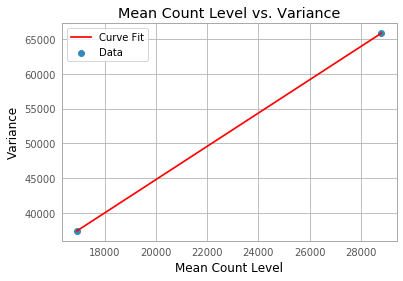

In [15]:
# This block plots the data from Canvas, fits a line on the data, and calculates the gain
vari = []
mcl = []
vari.append(vari_164)
vari.append(vari_242)
mcl.append(mcl_164)
mcl.append(mcl_242)

def line(x, m, b):
    return (m*x) + b
m0,b0 = (0.5,0.5)
mt,bt = (12.29,-121739)
coeffs, fiterr = curve_fit(line, mcl, vari, p0=(mt,bt))
print ("Slope =%s, Y-Intercept=%s" % (coeffs[0], coeffs[1]))
plt.scatter(mcl,vari,label ='Data')
yvals1 = []
for i in mcl:
    yvals1.append(line(i,coeffs[0],coeffs[1]))
plt.plot(mcl,yvals1, 'r-', label = 'Curve Fit')
plt.xlabel("Mean Count Level")
plt.ylabel("Variance")
plt.title("Mean Count Level vs. Variance")
plt.legend(loc='best')
print("Gain = ", 1/coeffs[0])
plt.show()

In [16]:
# This is the beginning of the real data we collected
irl_bias = []

# The real bias frames are imported
for i in range(1,11):
    irl_bias.append(fits.getdata("Bias-"+"0"*(4-len(str(i)))+str(i)+".fit" , ext=0).astype(np.int))

# Frames of light exposure with light level 100
light_100 = []
for i in range(1,11):
    light_100.append(fits.getdata("Light_100-"+"0"*(4-len(str(i)))+str(i)+".fit" , ext=0).astype(np.int))
    
# Frames of light exposure with light level 150    
light_150 = []
for i in range(1,11):
    light_150.append(fits.getdata("Light_150-"+"0"*(4-len(str(i)))+str(i)+".fit" , ext=0).astype(np.int))

# Frames of light exposure with light level 204
light_204 = []
for i in range(11,21):
    light_204.append(fits.getdata("Light_204-"+"0"*(4-len(str(i)))+str(i)+".fit" , ext=0).astype(np.int))

In [31]:
irl_mcl = []
irl_vari = []

# Taking the average of the bias
irl_avbias = sum(irl_bias)/10

# Subtracting the averge bias from the light frames, taking the mean, 
# and then taking the mean of the varince of each of the light frames.
light_100_sub_bias = np.array([light1 - irl_avbias for light1 in light_100])
mcl_100 = light_100_sub_bias.mean()
vari_100 = (light_100_sub_bias.var(axis=0)).mean()

light_150_sub_bias = np.array([light2 - irl_avbias for light2 in light_150])
mcl_150 = light_150_sub_bias.mean()
vari_150 = (light_150_sub_bias.var(axis=0)).mean()

light_204_sub_bias = np.array([light3 - irl_avbias for light3 in light_204])
mcl_204 = light_204_sub_bias.mean()
vari_204 = (light_204_sub_bias.var(axis=0)).mean()

Slope = 1.7560896048971437, Y-Intercept = 3254.95119830665
Gain =  0.5694470243496323
Read Noise:  12.079660425540284
There is no evidence of non-linearity in this graph.


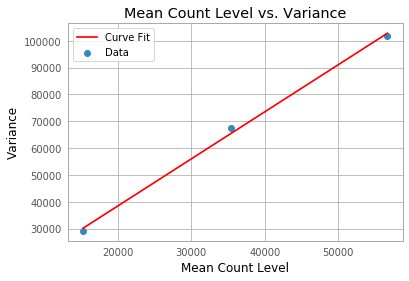

In [32]:
irl_vari.append(vari_100)
irl_vari.append(vari_150)
irl_vari.append(vari_204)
irl_mcl.append(mcl_100)
irl_mcl.append(mcl_150)
irl_mcl.append(mcl_204)

# Making the function to fit the data to.
def line(x, m, b):
    return (m*x) + b
m0,b0 = (0.5,0.5)
mt,bt = (1.76,2200)
coeffs, fiterr = curve_fit(line, irl_mcl, irl_vari, p0=(mt,bt))
print ("Slope = %s, Y-Intercept = %s" % (coeffs[0], coeffs[1]))
# Plotting the mean vs. the variation
plt.scatter(irl_mcl,irl_vari,label ='Data')
# Fitting the function to the data
yvals = []
for i in irl_mcl:
    yvals.append(line(i,coeffs[0],coeffs[1]))
plt.plot(irl_mcl,yvals, 'r-', label = 'Curve Fit')
plt.xlabel("Mean Count Level")
plt.ylabel("Variance")
plt.title("Mean Count Level vs. Variance")
plt.legend(loc='best')
gain = 1/coeffs[0]
print("Gain = ", gain)
print("Read Noise: ", coeffs[0]*irl_avbias.std(axis=0).mean())
print("There is no evidence of non-linearity in this graph.")
# We can make this calculation becasue when measured in electrons, the values folow a Poisson distribution.

In [33]:
# This block takes the class' dark data and puts it into an array.

temp = []
time = []
dark = []

temp.append(4.6)
temp.append(6)
temp.append(6)
temp.append(6)
temp.append(7)
temp.append(7)
temp.append(7.1)
temp.append(8)
temp.append(8.9)
temp.append(9)
temp.append(9)
temp.append(9)
temp.append(9.4)
temp.append(9.4)

time.append(450)
time.append(300)
time.append(600)
time.append(900)
time.append(400)
time.append(600)
time.append(400)
time.append(400)
time.append(300)
time.append(300)
time.append(600)
time.append(600)
time.append(300)
time.append(300)

for i in range(0,14):
    dark.append(fits.getdata(str(temp[i]) + "_" + str(time[i]) + ".fit" , ext=0).astype(np.int))

# Multiplying by gain to turn it into electrons.
for i in dark:
    i = i * gain
irl_bias_2 = []

for i in range(1,51):
    irl_bias_2.append(fits.getdata("Bias-Day2-"+"0"*(4-len(str(i)))+str(i)+".fit" , ext=0).astype(np.int))
    
# Changes the temperature to Kelvin from Celcius
for i in range(0,14):
    temp[i] = temp[i] + 273

In [34]:
av_dark = []

# Takes the average of the new biases
irl_avbias_2 = sum(irl_bias_2)/50

# Subtracts the average bias from the dark values and
# then calculates the electrons per second for the dark frames.
dark_sub_bias = np.array([dark1 - irl_avbias_2 for dark1 in dark])
for i in range(0,14):
    dark_sub_bias[i] = dark_sub_bias[i]/time[i]

# Calculates the median value of each dark current frame
for i in dark_sub_bias:
    av_dark.append(np.median(i))

A=22889.17068372622, E_g=0.9718505995907765


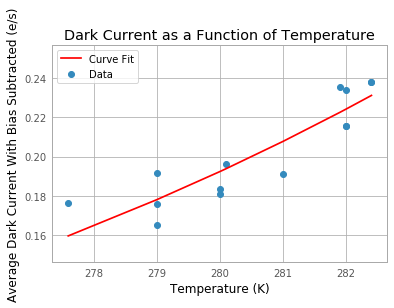

In [35]:
# This defines the equation for dark current that will be fit to the data
k = 8.61733034 * (10**(-5)) # eV/K
def dc(x, A, E):
    return A*(x**1.5)*np.exp(-E/(2*k*x))
A0,E0 = (0.5,0.5)
At,Et = (1000,1)
coeffs, fiterr = curve_fit(dc, temp, av_dark, p0=(At,Et))
print ("A=%s, E_g=%s" % (coeffs[0], coeffs[1]))
plt.scatter(temp, av_dark,label='Data')
yvals2 = []
for i in temp:
    yvals2.append(dc(i,coeffs[0],coeffs[1])) 
plt.plot(temp,yvals2,'r-',label='Curve Fit')
plt.xlabel("Temperature (K)")
plt.ylabel("Average Dark Current With Bias Subtracted (e/s)")
plt.title("Dark Current as a Function of Temperature")
plt.legend(loc='best')